# LangGraph
## Quick Start
- https://langchain-ai.github.io/langgraph/tutorials/introduction/

### Part 1: Build a Basic Chatbot

In [1]:
!pdm add langgraph langchain-aws

Adding packages to default dependencies: langgraph, langchain-aws
⠏ 0:00:00 Resolve for environment (==3.12.*) None
⠹ 0:00:01 Resolve for environment (==3.12.*) 2 resolved, 14 to resolveresolvem━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━  
⠦ 0:00:01 Resolve for environment (==3.12.*) 2 resolved, 14 to resolve━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━  
⠏ 0:00:01 Resolve for environment (==3.12.*) 2 resolved, 14 to resolve━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━  
⠹ 0:00:01 Resolve for environment (==3.12.*) 2 resolved, 14 to resolve━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━  
⠴ 0:00:02 Resolve for environment (==3.12.*) 2 resolved, 14 to resolvem━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━  
⠇ 0:00:02 Resolve for environment (==3.12.*) 2 resolved, 14 to resolvem━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━  
⠹ 0:00:02 Resolve for environment (==3.12.*) 2 resolved, 14 to resolvem━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 
⠴ 0:00:02 Resolve for environment (==3.12.*) 2 resolved, 14 to resolve91m━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━  
⠇ 0:00:03 Resolve for environmen

In [2]:
from typing import Annotated

from typing_extensions import TypedDict

from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages


class State(TypedDict):
    # Messages have the type "list". The `add_messages` function
    # in the annotation defines how this state key should be updated
    # (in this case, it appends messages to the list, rather than overwriting them)
    messages: Annotated[list, add_messages]


graph_builder = StateGraph(State)

In [3]:
from langchain_aws import ChatBedrock

model = ChatBedrock(model_id="anthropic.claude-3-5-sonnet-20240620-v1:0")

def chatbot(state: State):
    return {"messages": [model.invoke(state["messages"])]}

# The first argument is the unique node name
# The second argument is the function or object that will be called whenever
# the node is used.
graph_builder.add_node("chatbot", chatbot)

In [4]:
graph_builder.add_edge(START, "chatbot")
graph_builder.add_edge("chatbot", END)

graph = graph_builder.compile()

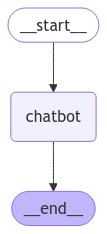

In [5]:
from IPython.display import Image, display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass

In [6]:
def stream_graph_updates(user_input: str):
    for event in graph.stream({"messages": [("user", user_input)]}):
        for value in event.values():
            print("Assistant:", value["messages"][-1].content)


while True:
    try:
        user_input = input("User: ")
        if user_input.lower() in ["quit", "exit", "q"]:
            print("Goodbye!")
            break

        stream_graph_updates(user_input)
    except:
        # fallback if input() is not available
        user_input = "What do you know about LangGraph?"
        print("User: " + user_input)
        stream_graph_updates(user_input)
        break

User:  Hello?


Assistant: Hello! How can I assist you today? Feel free to ask me any questions or let me know if you need help with something.


User:  What is LLM?


Assistant: LLM stands for "Large Language Model." It's a type of artificial intelligence (AI) model designed to understand, generate, and manipulate human language. Here are some key points about LLMs:

1. Size and complexity: LLMs are typically very large neural networks trained on vast amounts of text data.

2. Training: They are trained using unsupervised learning on diverse text sources from the internet, books, and other written materials.

3. Capabilities: LLMs can perform various language tasks, including:
   - Text generation
   - Translation
   - Summarization
   - Question answering
   - Sentiment analysis
   - Code generation

4. Examples: Some well-known LLMs include GPT (Generative Pre-trained Transformer) models like GPT-3 and GPT-4, BERT (Bidirectional Encoder Representations from Transformers), and T5 (Text-to-Text Transfer Transformer).

5. Applications: LLMs are used in chatbots, virtual assistants, content creation, and various natural language processing tasks.

6. 

User:  quit


Goodbye!


### Part 2: Enhancing the Chatbot with Tools

In [7]:
!pdm add tavily-python langchain_community

Adding packages to default dependencies: tavily-python, langchain-community
⠸ 0:00:00 Resolve for environment (==3.12.*) None
⠦ 0:00:00 Resolve for environment (==3.12.*) 2 resolved, 14 to resolveresolve0m━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━  
⠏ 0:00:00 Resolve for environment (==3.12.*) 2 resolved, 14 to resolve━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━  
⠹ 0:00:01 Resolve for environment (==3.12.*) 2 resolved, 14 to resolve━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━  
⠴ 0:00:01 Resolve for environment (==3.12.*) 2 resolved, 14 to resolvem━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━  
⠏ 0:00:01 Resolve for environment (==3.12.*) 2 resolved, 14 to resolvem━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━  
⠹ 0:00:01 Resolve for environment (==3.12.*) 2 resolved, 14 to resolve1m━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━  
⠴ 0:00:02 Resolve for environment (==3.12.*) 2 resolved, 14 to resolve35m━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━  
⠏ 0:00:02 Resolve for environment (==3.12.*) 3 resolved, 14 to resolve resolvem━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━  
⠹ 0:00:0

In [8]:
from langchain_community.tools.tavily_search import TavilySearchResults

tool = TavilySearchResults(max_results=2)
tools = [tool]
tool.invoke("What's a 'node' in LangGraph?")

[{'url': 'https://medium.com/@cplog/introduction-to-langgraph-a-beginners-guide-14f9be027141',
  'content': 'Nodes: Nodes are the building blocks of your LangGraph. Each node represents a function or a computation step. You define nodes to perform specific tasks, such as processing input, making'},
 {'url': 'https://medium.com/@kbdhunga/beginners-guide-to-langgraph-understanding-state-nodes-and-edges-part-1-897e6114fa48',
  'content': 'Each node in a LangGraph graph has the ability to access, read, and write to the state. When a node modifies the state, it effectively broadcasts this information to all other nodes within the graph .'}]

In [9]:
from langchain_aws import ChatBedrock

llm = ChatBedrock(model_id="anthropic.claude-3-5-sonnet-20240620-v1:0")

from typing import Annotated
from typing_extensions import TypedDict

from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages


class State(TypedDict):
    messages: Annotated[list, add_messages]


graph_builder = StateGraph(State)


llm_with_tools = llm.bind_tools(tools)


def chatbot(state: State):
    return {"messages": [llm_with_tools.invoke(state["messages"])]}


graph_builder.add_node("chatbot", chatbot)

In [10]:
import json

from langchain_core.messages import ToolMessage


class BasicToolNode:
    """A node that runs the tools requested in the last AIMessage."""

    def __init__(self, tools: list) -> None:
        self.tools_by_name = {tool.name: tool for tool in tools}

    def __call__(self, inputs: dict):
        if messages := inputs.get("messages", []):
            message = messages[-1]
        else:
            raise ValueError("No message found in input")
        outputs = []
        for tool_call in message.tool_calls:
            tool_result = self.tools_by_name[tool_call["name"]].invoke(tool_call["args"])
            outputs.append(
                ToolMessage(
                    content=json.dumps(tool_result),
                    name=tool_call["name"],
                    tool_call_id=tool_call["id"],
                )
            )
        return {"messages": outputs}


tool_node = BasicToolNode(tools=[tool])
graph_builder.add_node("tools", tool_node)


In [11]:
from typing import Literal


def route_tools(state: State):
    """
    Use in the conditional_edge to route to the ToolNode if the last message
    has tool calls. Otherwise, route to the end.
    """
    if isinstance(state, list):
        ai_message = state[-1]
    elif messages := state.get("messages", []):
        ai_message = messages[-1]
    else:
        raise ValueError(f"No messages found in input state to tool_edge: {state}")
    if hasattr(ai_message, "tool_calls") and len(ai_message.tool_calls) > 0:
        return "tools"
    return END



graph_builder.add_edge(START, "chatbot")
graph_builder.add_conditional_edges("chatbot", route_tools, {"tools": "tools", END: END})
graph_builder.add_edge("tools", "chatbot")
graph = graph_builder.compile()

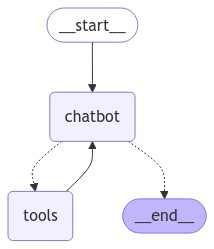

In [12]:
from IPython.display import Image, display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass

In [ ]:
while True:
    try:
        user_input = input("User: ")
        if user_input.lower() in ["quit", "exit", "q"]:
            print("Goodbye!")
            break

        stream_graph_updates(user_input)
    except:
        # fallback if input() is not available
        user_input = "What do you know about LangGraph?"
        print("User: " + user_input)
        stream_graph_updates(user_input)
        break

User:  What do you know about LangGraph?


Assistant: 
Assistant: [{"url": "https://medium.com/@lucas.dahan/hands-on-langgraph-building-a-multi-agent-assistant-06aa68ed942f", "content": "Recognizing the need to treat AI as a component of a product meant to deliver value is the first step towards a positive ROI. ... Build Docs-to-Code Tool with LangChain, LangGraph, and Streamlit"}, {"url": "https://www.langchain.com/langgraph", "content": "Use LangGraph Platform to templatize your cognitive architecture so that tools, prompts, and models are easily configurable with LangGraph Platform Assistants. ... multi-actor applications with LLMs has transformed how we evaluate and optimize the performance of our AI guest-facing solutions. LangGraph enables granular control over the agent's"}]
Assistant: Based on the search results, I can provide you with some information about LangGraph:

1. LangGraph is an AI tool that is part of the LangChain ecosystem.

2. It is designed to help build and manage complex, multi-agent AI applications.

3